Forecasting Network Activity and Anomaly detection in Computer Networks Using Network Traffic Data

In [1]:
!pip install prophet

In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet

Data Preprocessing

In [3]:
# Load the data
df = pd.read_csv('cs448b_ipasn.csv')

# Rename columns for Prophet
df.rename(columns={'date': 'ds', 'l_ipn': 'ip', 'f': 'y'}, inplace=True)


In [4]:
odd_activity_dates = pd.to_datetime(['2006-08-24', '2006-09-04', '2006-09-18', '2006-09-26'])

Model Training

In [5]:
model = Prophet(daily_seasonality=False)

In [6]:
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxpl5gsf/qvw8a9rq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoxpl5gsf/mhgx2ika.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51598', 'data', 'file=/tmp/tmpoxpl5gsf/qvw8a9rq.json', 'init=/tmp/tmpoxpl5gsf/mhgx2ika.json', 'output', 'file=/tmp/tmpoxpl5gsf/prophet_model1sn6q78h/prophet_model-20231129075201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecasting

In [7]:
future = model.make_future_dataframe(periods=30)  # Adjust the number of periods as needed

In [8]:
forecast = model.predict(future)

In [9]:
odd_activity_predictions = forecast[forecast['ds'].isin(odd_activity_dates)][['ds', 'yhat']]

In [10]:
# Convert 'ds' column to datetime in both DataFrames
odd_activity_predictions['ds'] = pd.to_datetime(odd_activity_predictions['ds'])
df['ds'] = pd.to_datetime(df['ds'])

# Merge DataFrames
merged_data = pd.merge(odd_activity_predictions, df, on='ds', how='left')

# Calculate anomaly
merged_data['anomaly'] = abs(merged_data['y'] - merged_data['yhat'])

In [11]:
threshold = 5  # Adjust based on the characteristics of your data
anomalies = merged_data[merged_data['anomaly'] > threshold]

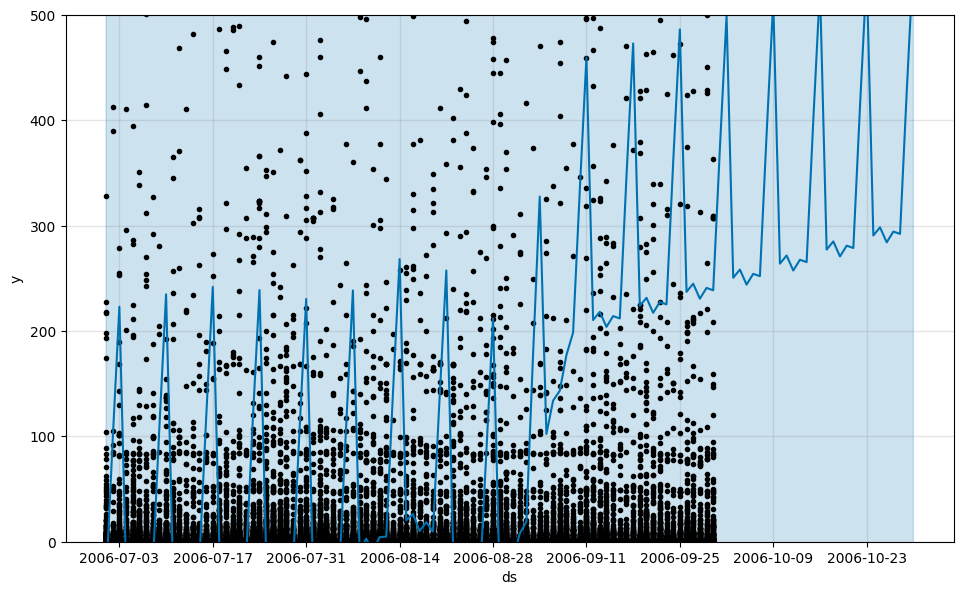

In [12]:
import matplotlib.pyplot as plt

# Create a figure and plot the forecast
fig = model.plot(forecast)

# Customize the y-axis scale
plt.ylim(0, 500)  # Adjust the values as needed

# Show the plot
plt.show()

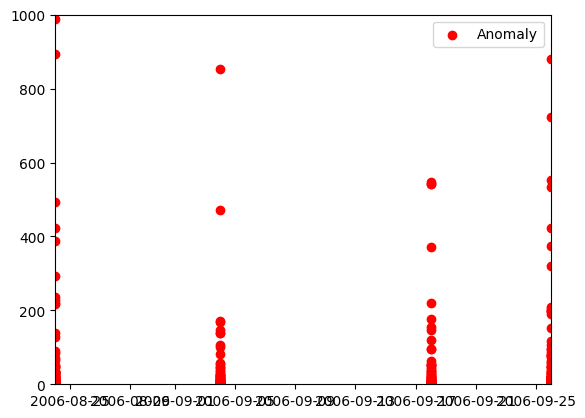

In [13]:
# Create a scatter plot of anomalies
plt.scatter(anomalies['ds'], anomalies['y'], color='red', label='Anomaly')

# Customize the y-axis scale
plt.xlim(anomalies['ds'].min(), anomalies['ds'].max())
plt.ylim(0, 1000)  # Adjust the values as needed

# Add legend and show the plot
plt.legend()
plt.show()
